# **프로젝트 : 데이터 분석을 활용해 공약 설정하기**

정치인이 된 영희는 지역구 선거를 나가려고 합니다. 영희의 핵심 공약은 "공공 와이파이 설치하기"입니다.   
영희가 "공공 와이파이 설치하기" 공약으로 당선될 확률을 높이기 위해서는 공공 와이파이가 적은 지역에 기기를 설치해야 합니다.  
따라서 영희는 공공 와이파이가 가장 적은 지역구에 출마하여 자신의 공약을 효과적으로 홍보하고 당선 확률을 올리고자 합니다.     
영희가 자신이 출마할 지역구를 고를 수 있도록 도와줍니다. 

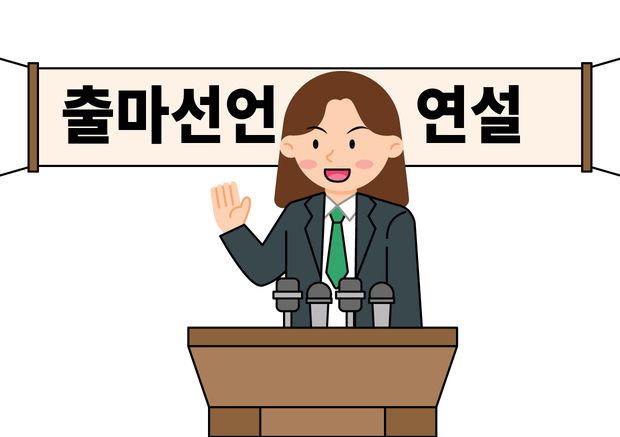

## 1. 데이터셋 불러오기

### 1.1 데이터셋 불러오기
pandas 패키지를 이용해 다운로드한 데이터를 불러와야 합니다. 우선 pandas 라이브러리를 불러와 봅시다.  
주의! 아래 패키지를 반드시 설치해주세요.

In [1]:
# 실행해주세요!
import pandas as pd

csv를 확장자로 가지는 csv 파일은 pandas에 있는 read_csv 함수를 사용하면 DataFrame으로 불러올 수 있습니다. 사용법은 아래와 같습니다.
* `pd.read_csv(파일 경로)` : 파일경로에 위치한 csv 파일을 읽어 DataFrame으로 변경해줍니다.

In [2]:
df = pd.read_csv("https://tmn-bucket-materials-all.s3.ap-northeast-2.amazonaws.com/data/free_wifi.csv")
df

,번호,설치장소명,설치장소상세,설치시도명,설치시군구명,설치시설구분,서비스제공사명,와이파이SSID,설치연월,소재지도로명주소,소재지지번주소,관리기관명,관리기관전화번호,WGS84위도,WGS84경도,데이터기준일자
0,1,대산적십자사광주전남지사,사무실,광주광역시,북구,서민·복지시설,북구,Public wifi free,NaN,광주광역시 북구 매곡로 117,광주광역시 북구 매곡동 256,광주광역시 북구청,062-410-6912,35.195136,126.889889,2020-06-30
1,2,용봉청소년문화의집,사무실,광주광역시,북구,서민·복지시설,북구,Public wifi free,NaN,광주광역시 북구 비엔날레로 135,광주광역시 북구 용봉동 산 143,광주광역시 북구청,062-410-6912,35.183905,126.891552,2020-06-30
2,3,매곡동 주민센터,동주민센터내,광주광역시,북구,관공서,북구,Public wifi free,NaN,광주광역시 북구 매곡로69번길 25(매곡동),광주광역시 북구 매곡동 80,광주광역시 북구청,062-410-6668,35.189635,126.892150,2020-06-30
3,4,풍향지역아동센터,사무실,광주광역시,북구,서민·복지시설,SKT,Public wifi free,NaN,광주광역시 북구 두방길1-1(풍향동),광주광역시 북구 풍향동 533-17,광주광역시 북구청,062-410-6935,35.166426,126.921604,2020-06-30
4,5,은총지역아동센터,사무실,광주광역시,북구,서민·복지시설,SKT,Public wifi free,NaN,광주광역시 북구 무등로 12(임동),광주광역시 북구 임동 405,광주광역시 북구청,062-410-6935,35.170313,126.885806,2020-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1508,운천어린이공원,운천어린이공원,광주광역시,서구,기타,KT,NaN,NaN,"광주광역시 서구 계수로59번길 4-9, 유촌어린이공원 1호 (쌍촌동)",NaN,광주광역시청,062-613-3022,35.160863,126.857787,2022-06-17
1508,1509,원마륵어린이공원,원마륵어린이공원,광주광역시,서구,기타,KT,NaN,NaN,"광주광역시 서구 상무공원로 142, 장수어린이공원 2호 (치평동)",NaN,광주광역시청,062-613-3022,35.157148,126.843395,2022-06-17
1509,1510,유촌어린이공원1,유촌어린이공원1,광주광역시,서구,기타,KT,NaN,NaN,"광주광역시 서구 상무대로 1012, 잿등 2312호 버스정류장(화정동)",NaN,광주광역시청,062-613-3022,35.151402,126.872659,2022-06-17
1510,1511,장수어린이공원2,장수어린이공원2,광주광역시,서구,기타,KT,NaN,NaN,광주광역시 서구 매월동 513-1 전평호수공원2,NaN,광주광역시청,062-613-3022,35.114385,126.848936,2022-06-17


DataFrame의 초기 5개 열을 보여주는 `df.head()` 함수를 사용해서 데이터가 제대로 불러와졌는지 확인합니다.

In [4]:
df.head()

,번호,설치장소명,설치장소상세,설치시도명,설치시군구명,설치시설구분,서비스제공사명,와이파이SSID,설치연월,소재지도로명주소,소재지지번주소,관리기관명,관리기관전화번호,WGS84위도,WGS84경도,데이터기준일자
0,1,대산적십자사광주전남지사,사무실,광주광역시,북구,서민·복지시설,북구,Public wifi free,NaN,광주광역시 북구 매곡로 117,광주광역시 북구 매곡동 256,광주광역시 북구청,062-410-6912,35.195136,126.889889,2020-06-30
1,2,용봉청소년문화의집,사무실,광주광역시,북구,서민·복지시설,북구,Public wifi free,NaN,광주광역시 북구 비엔날레로 135,광주광역시 북구 용봉동 산 143,광주광역시 북구청,062-410-6912,35.183905,126.891552,2020-06-30
2,3,매곡동 주민센터,동주민센터내,광주광역시,북구,관공서,북구,Public wifi free,NaN,광주광역시 북구 매곡로69번길 25(매곡동),광주광역시 북구 매곡동 80,광주광역시 북구청,062-410-6668,35.189635,126.892150,2020-06-30
3,4,풍향지역아동센터,사무실,광주광역시,북구,서민·복지시설,SKT,Public wifi free,NaN,광주광역시 북구 두방길1-1(풍향동),광주광역시 북구 풍향동 533-17,광주광역시 북구청,062-410-6935,35.166426,126.921604,2020-06-30
4,5,은총지역아동센터,사무실,광주광역시,북구,서민·복지시설,SKT,Public wifi free,NaN,광주광역시 북구 무등로 12(임동),광주광역시 북구 임동 405,광주광역시 북구청,062-410-6935,35.170313,126.885806,2020-06-30


## 2. 데이터 전처리 및 분석

### 2.1. 데이터 전처리 - 빈 데이터 확인하기
불러온 데이터에는 각 와이파이의 위치 정보가 나와 있습니다.   
본격적인 분석을 진행하기 전에 `"설치시군구명"`라는 열에서 비어있는 데이터가 있는지 확인해봅시다.
* `df.info` 함수를 사용하면 각 열의 이름, 비어있지 않은 값의 개수, 열의 자료형 등 여러가지 정보를 확인할 수 있습니다.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   번호        1512 non-null   int64  
 1   설치장소명     1512 non-null   object 
 2   설치장소상세    1512 non-null   object 
 3   설치시도명     1512 non-null   object 
 4   설치시군구명    1512 non-null   object 
 5   설치시설구분    1512 non-null   object 
 6   서비스제공사명   1512 non-null   object 
 7   와이파이SSID  493 non-null    object 
 8   설치연월      172 non-null    object 
 9   소재지도로명주소  1292 non-null   object 
 10  소재지지번주소   681 non-null    object 
 11  관리기관명     1512 non-null   object 
 12  관리기관전화번호  1512 non-null   object 
 13  WGS84위도   1512 non-null   float64
 14  WGS84경도   1512 non-null   float64
 15  데이터기준일자   1512 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 189.1+ KB
None


### 2.2. 데이터 분석 - 고유한 값 찾기
현재 데이터의 `"설치시군구명"`에는 와이파이가 설치된 장소의 시군구명이 기록되어 있습니다. 해당 시군구명은 어떤 것들이 있는지 확인해봅시다.
* `df['열 이름'].unique` 함수를 사용하면 열에 존재하는 고유한 값들을 확인할 수 있습니다

<a href='#jce-judge/open/A_cZFNLXp2g' target='_self'><h3>판다스 연습 1 - 고유값 확인하기</h3></a>


In [6]:
df['설치시군구명'].unique()

array(['북구', '동구', '남구', '광산구', '서구'], dtype=object)

### 2.3. 데이터 분석 - 고유한 값의 개수 새기
위에서 데이터 속 고유한 시군구명의 리스트를 얻을 수 있었습니다.  
이제 남은 것은 각 시군구명 별 무료 와이파이 개수를 확인하는 것입니다.    
두가지 방법으로 고유한 값의 개수를 확인할 수 있습니다. 그 하나는 반복문을 사용하는 방법이고, 다른 하나는 자체 함수를 사용하는 방법입니다. 

#### 2.3.1. 반복문 사용하기
아래의 절차에 따라 코딩을 해봅시다.
1. 고유한 시군구명 리스트로 반복문을 선언합니다.
2. 각 반복문마다 데이터프레임에서 해당 시군구명을 가지는 열의 개수를 출력합니다.

* `df[df[<column 이름>] == 값]`을 사용하면 그 열의 값이 해당 값인 모든 행을 가져올 수 있습니다.
* `len(df)`를 사용하면 df의 길이를 출력할 수 있습니다.

In [7]:
areas = list(df['설치시군구명'].unique())  # 고유한 시군구명 리스트를 저장해줍니다. 
for area in areas:  # 각 시군구명을 순회합니다. 
    count = len(df[df['설치시군구명'] == area])  # 열의 값이 해당 시군구명인 모든 행의 길이를 count변수에 저장해줍니다. 
    print(area, count)

북구 224
동구 97
남구 172
광산구 714
서구 305


#### 2.3.2. 자체 함수 사용하기
반복문을 사용하지 않아도 판다스에서 제공하는 자체 함수를 사용하면 손쉽게 열의 개수를 출력할 수 있습니다.  
자체 함수를 활용하여 고유한 값의 개수를 출력한 후 위에서 출력한 개수와 같은지 확인해보세요.
* `df.groupby(<열 이름>)[<열 이름>].count()`를 사용하면 고유값별 개수를 출력할 수 있습니다.

In [8]:
df.groupby('설치시군구명')['설치시군구명'].count()

설치시군구명
광산구    714
남구     172
동구      97
북구     224
서구     305
Name: 설치시군구명, dtype: int64

### 2.4. 데이터 분석 - 최소값 계산하기
앞의 과정에서 시군구마다 가지고 있는 무료 와이파이의 개수를 확인할 수 있었습니다.   
이제 시군구 별 와이파이 개수 중 최소개수를 가지는 시군구를 뽑아봅시다.   
1. 3.3.2에서 얻은 Series 데이터를 변수에 저장합니다.
2. series의 변수 명이 counts일때, `counts[counts == counts.min()]`를 작성하면 counts에서 가장 작은 값을 지니는 열을 가져올 수 있습니다.

In [9]:
counts = df.groupby('설치시군구명')['설치시군구명'].count()
counts[counts == counts.min()]

설치시군구명
동구    97
Name: 설치시군구명, dtype: int64

## 3. 마무리

여러분께 전달받은 데이터를 바탕으로 영희는 해당 시군구에 출마하여 당선될 수 있었습니다.^~^    

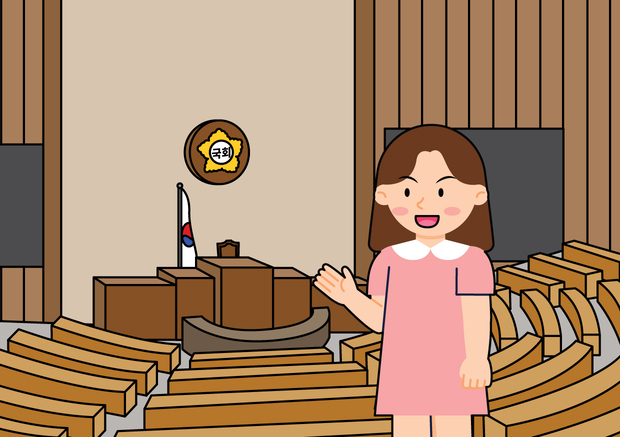